# Calculus I - Sympy Voorbereidingsopgave Januari 2026

## Naam: Afzal

## Voornaam: Daoud

## Studentennummer: r1113668

### Algemene instructies
1. Zorg ervoor dat je worksheet geen foutmeldingen geeft wanneer je deze herstart en volledig laat uitvoeren. Je kan dit nakijken door bovenaan op "Kernel" te klikken, en vervolgens "Restart & Run All".
2. Deze worksheet mag **op papier** naar het examen meegenomen worden.

**&copy; 2026 Didactisch Team Calculus I. Het kopiëren, reproduceren, aanpassen, vertalen, bewerken en/of wijzigen van één of meerdere examenvragen in dit document is verboden zonder voorafgaande toestemming van de auteur(s).**

---

### Imports en nuttige symbolen

Voer onderstaand blok code uit om de nodige pakketten te importeren.


In [60]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Vraag 1

Een klassiek model voor een massa-veersysteem met lineaire wrijving is de **gedempte harmonische oscillator**.  
Als $x(t)$ de uitwijking voorstelt, dan geldt
$$x''(t) + 2\xi\omega_0 x'(t) + \omega_0^2 x(t)=0,$$
waar $\omega_0>0$ de eigenfrequentie is en $\xi\ge 0$ de dempingsratio.


**Deelvraag (a)**:
Definieer bovenstaande differentiaalvergelijking (ODE) in SymPy met de symbolen `t, xi, w0` en een onbekende functie `x(t)`.

Sla de vergelijking op in een variabele `ode` en toon ze.


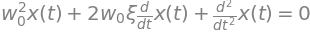

In [311]:
# defineer de symbolen en functies
t = sp.symbols('t', real=True)
w0 = sp.symbols('w0', positive=True)
xi = sp.symbols('xi', nonnegative=True)
x = sp.Function('x')

# defineer de differentiaal vergelijking
ode = sp.Eq(x(t).diff(t, 2) + 2*xi*w0*x(t).diff(t)+w0**2*x(t), 0)
ode

**Deelvraag (b):**  
Los de ODE op in SymPy met de beginvoorwaarden
$$ x(0) = 1, \quad x'(0) = 0, $$
waarbij $\omega_0$ en $\xi$ symbolisch blijven.

Toon je antwoord.


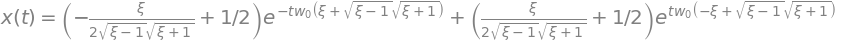

In [312]:
# begin voorwaarden
bgvw = {x(0):1, x(t).diff(t).subs(t, 0):0}

# los de ode op
opl = sp.dsolve(ode, x(t), ics=bgvw)
opl

**Deelvraag (c):**  
Fixeer $\omega_0 = 5$ en plot $x(t)$ op het interval $0 \leq t \leq 12$ voor drie verschillende dempingsratio’s:
$$\xi = 0.1, \quad \xi = 0.4, \quad \xi = 2.$$

Gebruik parametersubstitutie, `lambdify` en matplotlib. Zet alle krommen in één figuur met labels, een legend, assenlabels en een titel.

**Opmerking:** _de waarschuwing `Casting complex values to real discards the imaginary part` mag je negeren. Dit is te verwachten door een imaginaire wortel $\sqrt{\xi^2 - 1}$ voor $\xi < 1$ en vormt geen probleem._


In [158]:
opl = opl.subs(w0, 5)
XI1 = opl.subs(xi, 0.1)
XI2 = opl.subs(xi, 0.4)
XI3 = opl.subs(xi, 2)


T = np.linspace(0, 12, 1000)
YI1 = sp.lambdify(t, XI1.rhs, 'numpy')(T)
YI2 = sp.lambdify(t, XI2.rhs, 'numpy')(T)
YI3 = sp.lambdify(t, XI3.rhs, 'numpy')(T)

/usr/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


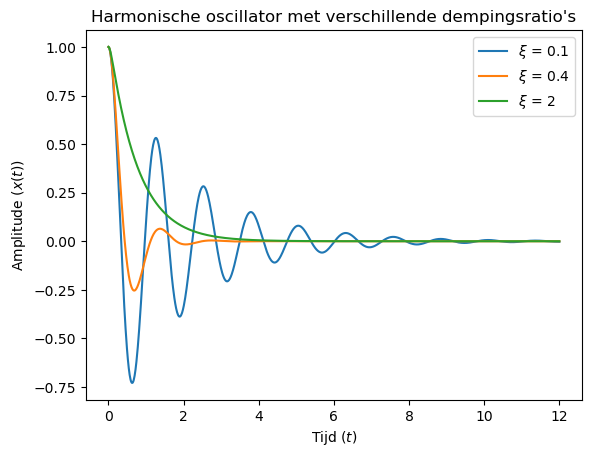

In [314]:
fig, ax = plt.subplots(1, 1)

ax.plot(T, YI1, label=r'$\xi$ = 0.1')
ax.plot(T, YI2, label=r'$\xi$ = 0.4')
ax.plot(T, YI3, label=r'$\xi$ = 2')

ax.set_xlabel(r'Tijd ($t$)')
ax.set_ylabel(r'Amplitude ($x(t)$)')
ax.set_title('Harmonische oscillator met verschillende dempingsratio\'s')

plt.legend()
plt.show()

## Vraag 2

Gegeven de volgende functie 
$$ f(x) = e^{x}\sin \, x$$
We zouden de afgeleide numeriek willen benaderen op het punt $a$. 

Dit kan gedaan worden door
$$ m \equiv \dfrac{df}{dx}(x=a) \approx \dfrac{f(a + \Delta x) - f(a) }{\Delta x} $$
met $\Delta x \in \mathbb{R}$. Los de volgende vragen op.

#### Deelvraag a
Definieer een Python functie die als argumenten de variabelen $\Delta x$ en Numpy getal $a$ aannemen en de corresponderende waarde $m_\mathrm{num}(\Delta x)$ teruggeeft op het punt $a$. Gebruik de volgende functionaliteiten van `sympy` om de afgeleide te evalueren:

- lambdify om de functie symbolisch te definiëren en vervolgens numeriek te evalueren voor $a$

**Opmerking**: Houd de code  overzichtelijk.

In [285]:
def mnum_functie(a, dx):
    f = sp.Function('f')
    x = sp.symbols('x')
    f = sp.exp(x)*sp.sin(x)

    
    f_num = sp.lambdify((x), f, 'numpy')
    f_num = (f_num(a + dx) - f_num(a))/dx
    return f_num

boven is dx een een getal, hieronder is dx een sympy symbool

In [286]:
# defineer functie
def mnum_functie2(a, deltax):
    # defineer alle symbolen
    f = sp.Function('f')
    x = sp.symbols('x')
    dx = sp.symbols(r'\Delta{x}')
    f = sp.exp(x)*sp.sin(x)

    # maak de functie
    dfdx = (f.subs(x, x+dx) - f)/dx
    # lambdify de functie met x->a en dx->delta x. Geef ook direct de waarden
    f_num = sp.lambdify((x, dx), dfdx, 'numpy')(a, deltax)
    return f_num

In [291]:
a = np.pi / 4
dx = 0.00001
resultaat1 = mnum_functie(a, dx)
resultaat2 = mnum_functie2(a, dx)

# test functie
afgeleide = sp.N(f.diff(x).subs(x, a))
verschil1 = afgeleide - resultaat1
verschil2 = afgeleide - resultaat2

# beide functies hebben hetzelfde antwoord
print(f'Het verschil met functie 1 is: {verschil1:.6f}, en met functie 2 is: {verschil2:.6f}')

Het verschil met functie 1 is: -0.000016, en met functie 2 is: -0.000016


#### Deelvraag b
Gebruik je gedefinieerde functie van vraagstuk 2.a om de afgeleide $m_\mathrm{num}(\Delta x)$ te bepalen voor $a=\pi/4$ en $\Delta x = 10^{-1}, 10^{-2}, ..., 10^{-5}.$ Sla alle waarden van $m_\mathrm{num}(\Delta x)$ op in een lijst. Toon alle resultaten.

In [294]:
# definieer a en delta _x
a = np.pi / 4
delta_x = []
# voeg automatisch de machten van -1 tot -5
for macht in range(1, 6):
    delta_x.append(10**-macht)

# definieer de m_num(deltax)
m_num = []

# bereken de m_num
for delta in delta_x:
    m_num.append(mnum_functie(a, delta))

# toon de resultaten
m_num

#### Deelvraag c
Maak een scatterplot  met het pakket `matplotlib` voor de error $E(\Delta x) = \vert m - m_\mathrm{num}({\Delta x}) \vert$ met $m$ de analytische uitkomst van bovenstaande afgeleide. Maak een log-log plot en beperk de plot tussen $x\in[10^{-6}, 10^0]$ en $y\in[10^{-6}, 10^{0}]$. Vergeet je assen niet te benoemen.

**Opmerking**: Houd de code overzichtelijk.

In [295]:
# definieer de symbolen en functie
f = sp.Function('f')
x = sp.symbols('x')
f = sp.exp(x)*sp.sin(x)

# bereken de exacte afgeleide
afgeleide = f.diff(x).subs(x, a) 
#bereken de E(delta_x)
error = []
for m in m_num:
    error.append(abs(afgeleide - m))

error

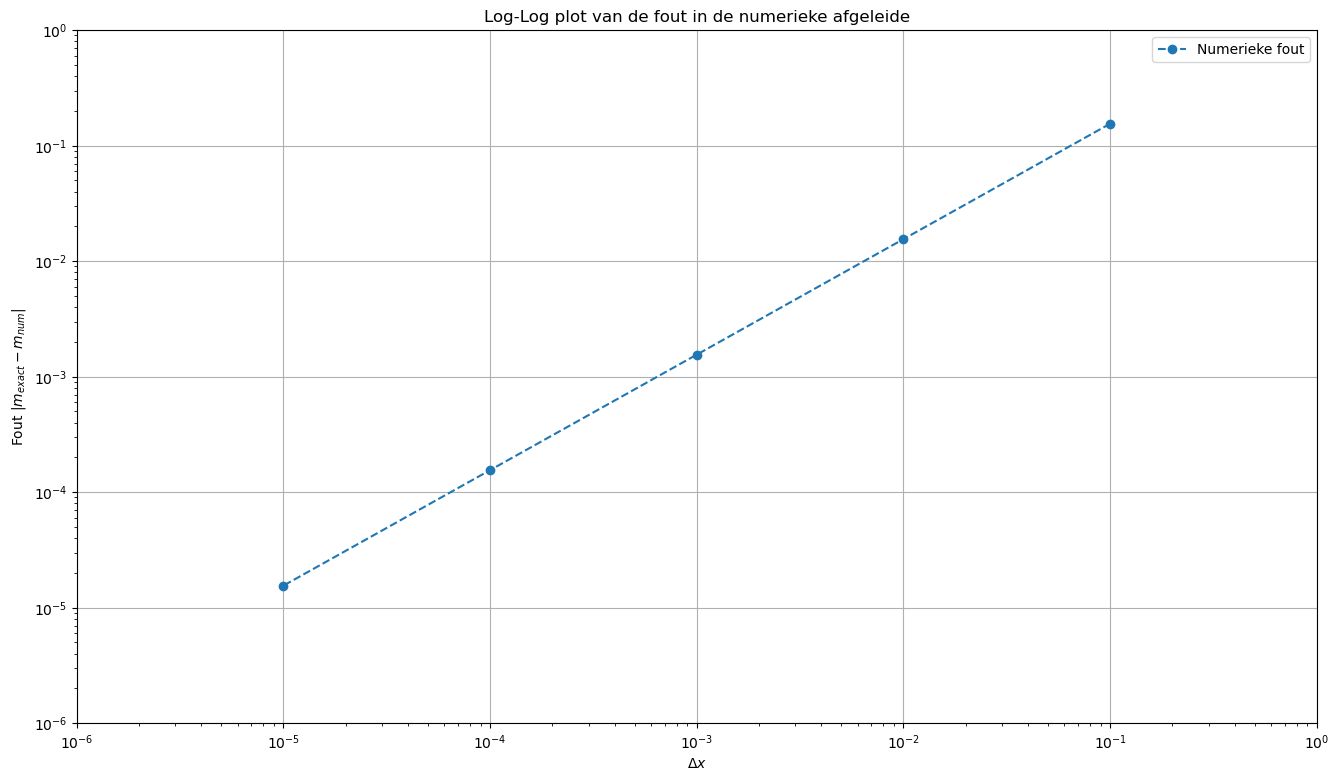

In [307]:
# maak figuur
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

ax.loglog(delta_x, error, 'o--', label='Numerieke fout')
ax.set_xlim(10**-6, 1)
ax.set_ylim(10**-6, 1)

ax.set_xlabel(r'$\Delta x$')
ax.set_ylabel('Fout $|m_{exact} - m_{num}|$')
ax.set_title('Log-Log plot van de fout in de numerieke afgeleide')
ax.legend()

plt.grid()
plt.show()